In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [95]:
invst_df=pd.read_excel(r'Buying Selling Zerodha_17.12.2023.xlsx')
invst_df.head()

,Symbol,ISIN,Trade Date,Exchange,Segment,Series,Trade Type,Auction,Quantity,Price,Trade ID,Order ID,Order Execution Time
0,SCI,INE109A01011,2019-10-29,NSE,EQ,EQ,buy,False,10,53.40,75014677,1300000000107749,2019-10-29T09:15:03
1,INFY,INE009A01021,2019-10-29,NSE,EQ,EQ,buy,False,1,648.00,25504104,1100000000101668,2019-10-29T09:45:08
2,INFY,INE009A01021,2019-10-29,NSE,EQ,EQ,buy,False,1,648.00,25504284,1100000000101668,2019-10-29T09:45:08
3,INFY,INE009A01021,2019-10-29,NSE,EQ,EQ,buy,False,1,648.00,25504288,1100000000101668,2019-10-29T09:45:08
4,SCI,INE109A01011,2019-10-30,NSE,EQ,EQ,buy,False,2,62.25,75800073,1300000000248320,2019-10-30T09:59:53


In [96]:
invst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Symbol                726 non-null    object 
 1   ISIN                  726 non-null    object 
 2   Trade Date            726 non-null    object 
 3   Exchange              726 non-null    object 
 4   Segment               726 non-null    object 
 5   Series                726 non-null    object 
 6   Trade Type            726 non-null    object 
 7   Auction               726 non-null    bool   
 8   Quantity              726 non-null    int64  
 9   Price                 726 non-null    float64
 10  Trade ID              726 non-null    int64  
 11  Order ID              726 non-null    int64  
 12  Order Execution Time  726 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 68.9+ KB


In [97]:
invst_df.shape

(726, 13)

In [98]:
invst_df.Series.value_counts()

EQ    671
A      41
B       7
T       5
BE      2
Name: Series, dtype: int64

In [99]:
invst_df.drop(["Order Execution Time","Order ID","Trade ID","ISIN","Segment","Auction"], axis=1, inplace=True)

In [100]:
invst_df.head()

,Symbol,Trade Date,Exchange,Series,Trade Type,Quantity,Price
0,SCI,2019-10-29,NSE,EQ,buy,10,53.40
1,INFY,2019-10-29,NSE,EQ,buy,1,648.00
2,INFY,2019-10-29,NSE,EQ,buy,1,648.00
3,INFY,2019-10-29,NSE,EQ,buy,1,648.00
4,SCI,2019-10-30,NSE,EQ,buy,2,62.25


In [101]:
def freq_col(df, col):
    print(df[col].value_counts())

In [102]:
for col in ['Symbol','Trade Date','Exchange','Series','Trade Type']:
    try:
        print(f'Frequency of {col}:')
        freq_col(invst_df,col)
        print('*****************************************************')
        print('\n')
    except:
        print("Invalid DataType")

Frequency of Symbol:
NIFTYBEES        38
INFY             37
HDFCBANK         31
ITBEES           30
HDFCLIFE         29
                 ..
HAPPSTMNDS        1
PAYTM             1
PRITIKAUTO-BE     1
AAVAS             1
NAVINFLUOR        1
Name: Symbol, Length: 95, dtype: int64
*****************************************************


Frequency of Trade Date:
2020-02-01    14
2022-03-08    13
2022-01-24    11
2021-12-20    11
2022-01-21    11
              ..
2021-09-21     1
2021-09-13     1
2021-08-12     1
2020-10-21     1
2023-12-14     1
Name: Trade Date, Length: 248, dtype: int64
*****************************************************


Frequency of Exchange:
NSE    673
BSE     53
Name: Exchange, dtype: int64
*****************************************************


Frequency of Series:
EQ    671
A      41
B       7
T       5
BE      2
Name: Series, dtype: int64
*****************************************************


Frequency of Trade Type:
buy     652
sell     74
Name: Trade Type, d

In [103]:
invst_df.loc[invst_df['Trade Type'] == "sell",'Quantity'] = -1 * invst_df['Quantity']

In [104]:
invst_df['Amount'] = invst_df['Quantity']*invst_df['Price']

In [105]:
invst_df['Amount'].sum()

1304293.73

In [106]:
invst_df['Trade Date']= pd.to_datetime(invst_df['Trade Date'])

In [107]:
invst_df['comm Amount'] = invst_df['Amount'].cumsum()

In [108]:
invst_df.head()

,Symbol,Trade Date,Exchange,Series,Trade Type,Quantity,Price,Amount,comm Amount
0,SCI,2019-10-29,NSE,EQ,buy,10,53.40,534.0,534.0
1,INFY,2019-10-29,NSE,EQ,buy,1,648.00,648.0,1182.0
2,INFY,2019-10-29,NSE,EQ,buy,1,648.00,648.0,1830.0
3,INFY,2019-10-29,NSE,EQ,buy,1,648.00,648.0,2478.0
4,SCI,2019-10-30,NSE,EQ,buy,2,62.25,124.5,2602.5


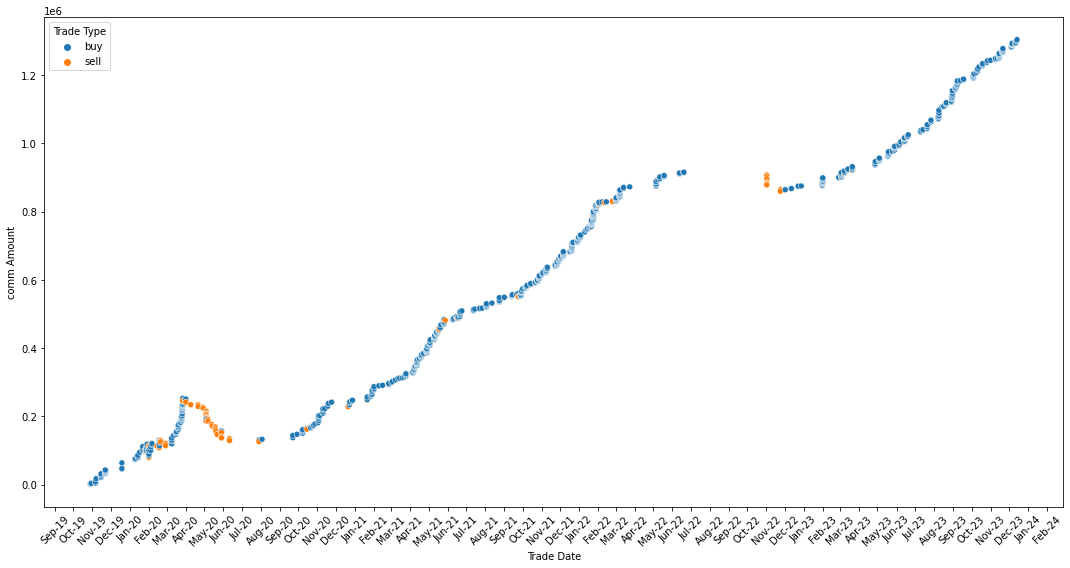

In [109]:
from matplotlib.dates import MonthLocator, DateFormatter
plt.figure(figsize=(15,8))
ax=sns.scatterplot("Trade Date","comm Amount",data=invst_df, color='red', hue='Trade Type', markers=True)
ax.xaxis.set_major_locator(MonthLocator())
#defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 45)

plt.tight_layout()
plt.show()

In [110]:
invst_df_groupby=invst_df.groupby(['Trade Date']).sum().reset_index()
invst_df_groupby

,Trade Date,Quantity,Price,Amount,comm Amount
0,2019-10-29,13,1997.40,2478.00,6024.00
1,2019-10-30,20,124.50,1245.00,6325.50
2,2019-11-06,7,1389.80,4864.30,13005.20
3,2019-11-07,3,2918.00,8754.00,17341.30
4,2019-11-15,4,14200.00,14200.00,104865.20
...,...,...,...,...,...
243,2023-12-06,10,5521.10,9823.20,7744313.53
244,2023-12-11,4,119.80,479.20,1293836.48
245,2023-12-12,40,35.55,1422.00,1295258.48
246,2023-12-13,65,167.56,5446.25,2600990.61


In [111]:
color = ['r' if y<0 else 'g' for y in invst_df_groupby.Amount]

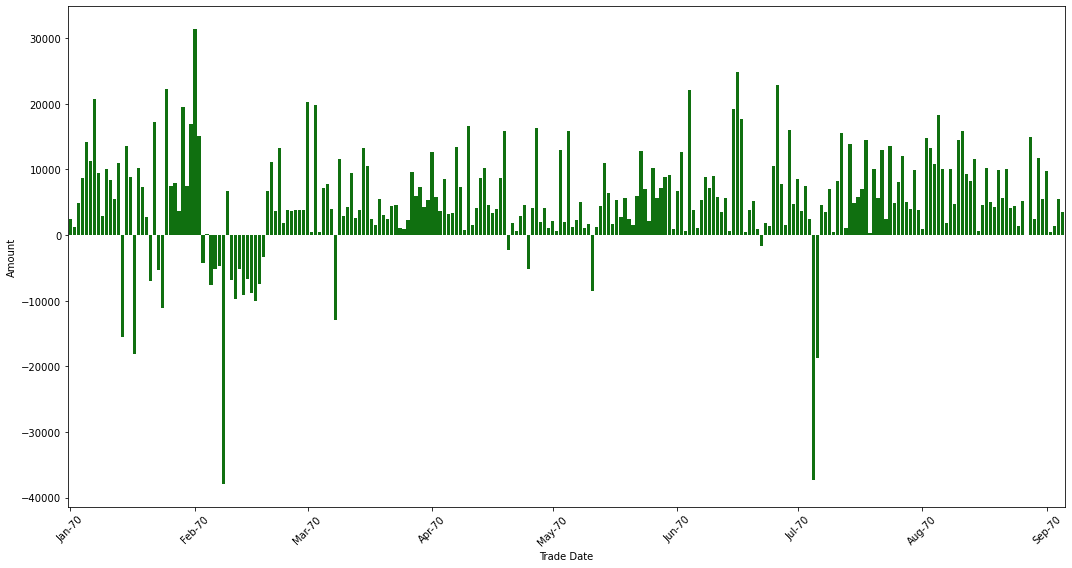

In [112]:
from matplotlib.dates import MonthLocator, DateFormatter
plt.figure(figsize=(15,8))
ax=sns.barplot("Trade Date","Amount",data=invst_df_groupby, color = 'g')
ax.xaxis.set_major_locator(MonthLocator())
#defines the label format
ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.tick_params(axis="x", labelrotation= 45)
plt.tight_layout()
plt.show()

In [113]:
invst_df_groupby=invst_df.groupby(["Symbol"]).aggregate({'Quantity':'sum', 'Amount':'sum'}).reset_index()
invst_df_groupby

,Symbol,Quantity,Amount
0,AAVAS,3,4514.85
1,ADVENZYMES,15,6284.75
2,AFFLE,21,22779.55
3,AFFLE-BE,2,8055.80
4,ALKEM,9,26300.10
...,...,...,...
90,TVSSCS,53,12019.30
91,UNIONBANK,70,6090.50
92,VOLTAS,10,8461.50
93,YESBANK,170,4919.00


In [114]:
#Lets see where tardes have squared off and net quantity is zero

In [115]:
invst_df_groupby[invst_df_groupby.Quantity ==0]

,Symbol,Quantity,Amount
21,CENTURYTEX,0,-306.10
23,CONCOR,0,-569.00
29,FMGOETZE,0,-495.90
42,HESTERBIO,0,-75.65
43,HINDPETRO,0,279.30
45,IBULHSGFIN,0,-900.80
47,IDBI,0,1373.75
49,INDUSINDBK,0,332.25
51,INOXLEISUR,0,-559.75
52,IRCTC,0,-773.20


In [116]:
invst_df_groupby[invst_df_groupby.Quantity ==0].Amount.sum()

-6120.65

In [117]:
invst_df_groupby.Symbol=invst_df_groupby.Symbol.astype('str')

So overall i'm profitable by 6k :p

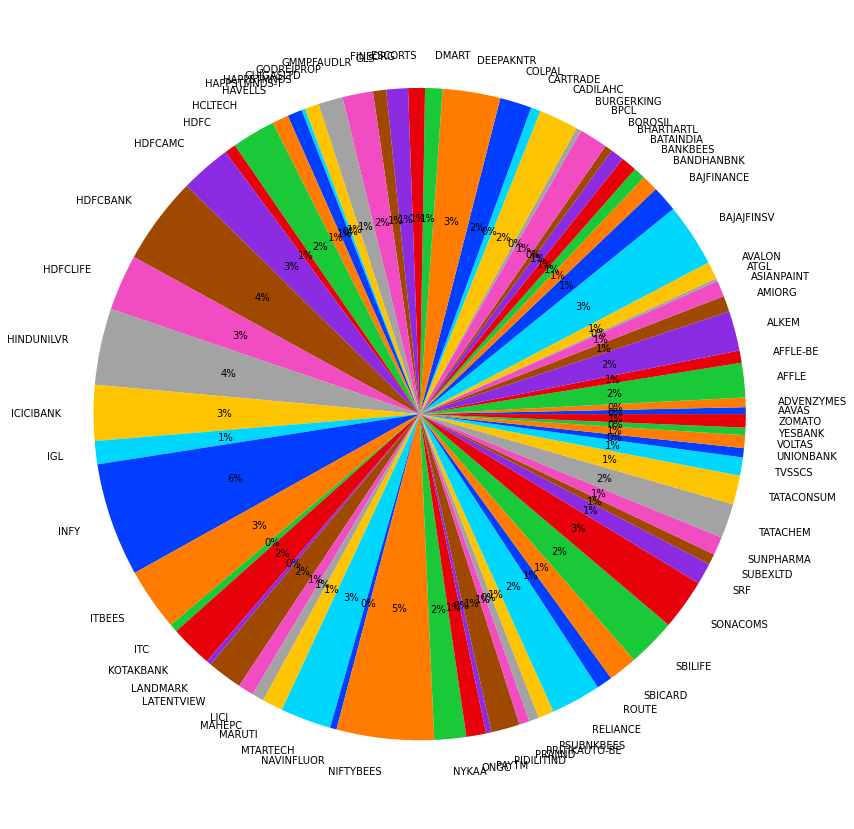

In [118]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.figure(figsize=(15,15))
# plotting data on chart
plt.pie(invst_df_groupby[(invst_df_groupby.Quantity !=0) & (invst_df_groupby.Amount >0)].Amount, 
        labels=invst_df_groupby[(invst_df_groupby.Quantity !=0) & (invst_df_groupby.Amount >0)].Symbol, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [119]:
holding=pd.read_excel(r'holdings-CK7879.xlsx')

In [120]:
holding.head()

,Symbol,ISIN,Sector,Quantity Available,Quantity Discrepant,Quantity Long Term,Quantity Pledged (Margin),Quantity Pledged (Loan),Average Price,Previous Closing Price,Unrealized P&L,Unrealized P&L Pct.
0,AAVAS,INE216P01012,Financials,3,0,0,0,0,1504.9500,1546.15,123.60,2.7376
1,ADVENZYMES,INE837H01020,Materials,15,0,15,0,0,418.9833,370.30,-730.25,-11.6194
2,AFFLE,INE00WC01027,Communication Services,31,0,18,0,0,994.6887,1213.20,6773.85,21.9678
3,ALKEM,INE540L01014,Health Care,9,0,8,0,0,2922.2333,4919.35,17974.05,68.3421
4,AMIORG,INE00FF01017,Health Care,8,0,0,0,0,1314.6750,1140.75,-1391.40,-13.2295


In [121]:
holding['invs_amount']=holding['Average Price']*holding['Quantity Available']

Best Gainers are


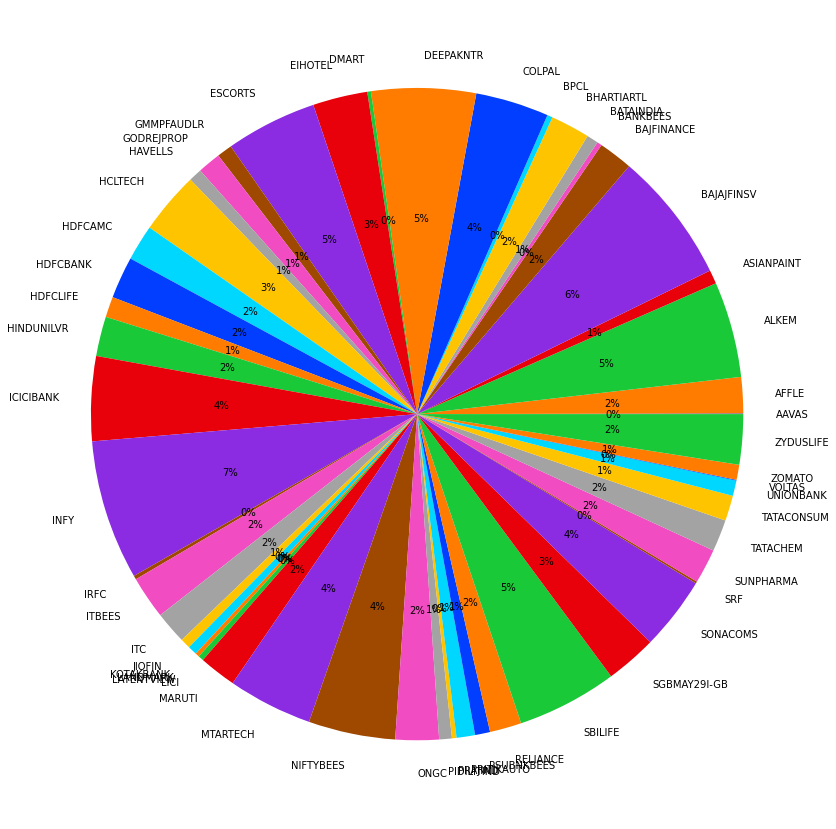

In [122]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.figure(figsize=(15,15))
# plotting data on chart
print("Best Gainers are")
plt.pie(holding[holding['Unrealized P&L'] >0]['Unrealized P&L'], 
        labels=holding[holding['Unrealized P&L'] >0].Symbol, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [123]:
holding_profit=holding[holding['Unrealized P&L'] >0]
holding_loss=holding[holding['Unrealized P&L'] <=0]

In [124]:
holding_profit['% profit'] =round((holding_profit['Unrealized P&L']/holding_profit['Unrealized P&L'].sum())*100,2)
holding_loss['% loss'] =round((holding_loss['Unrealized P&L']/holding_loss['Unrealized P&L'].sum())*100,2)

In [125]:
holding_profit.sort_values(by='% profit', ascending =False)[['Symbol','% profit']].head(10)

,Symbol,% profit
35,INFY,6.93
8,BAJAJFINSV,6.49
17,DEEPAKNTR,5.17
60,SBILIFE,4.97
3,ALKEM,4.75
20,ESCORTS,4.52
48,NIFTYBEES,4.31
46,MTARTECH,4.19
33,ICICIBANK,4.19
62,SONACOMS,3.64


Sore Losers are:


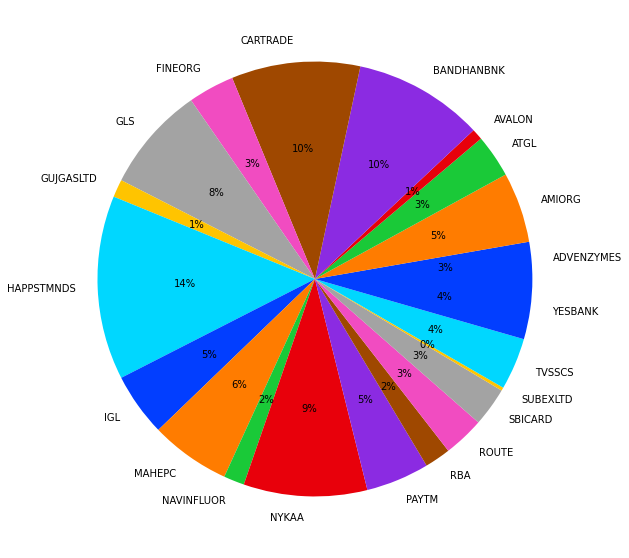

In [126]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
plt.figure(figsize=(10,10))
# plotting data on chart
print("Sore Losers are:")
plt.pie(holding[holding['Unrealized P&L'] <0]['Unrealized P&L']*-1, 
        labels=holding[holding['Unrealized P&L'] <0].Symbol, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [129]:
holding_loss.sort_values(by='% loss', ascending =False)[['Symbol','% loss']].head(10)

,Symbol,% loss
26,HAPPSTMNDS,13.69
10,BANDHANBNK,9.65
15,CARTRADE,9.57
49,NYKAA,9.18
22,GLS,7.85
44,MAHEPC,5.95
4,AMIORG,5.23
51,PAYTM,4.70
34,IGL,4.69
71,YESBANK,4.46


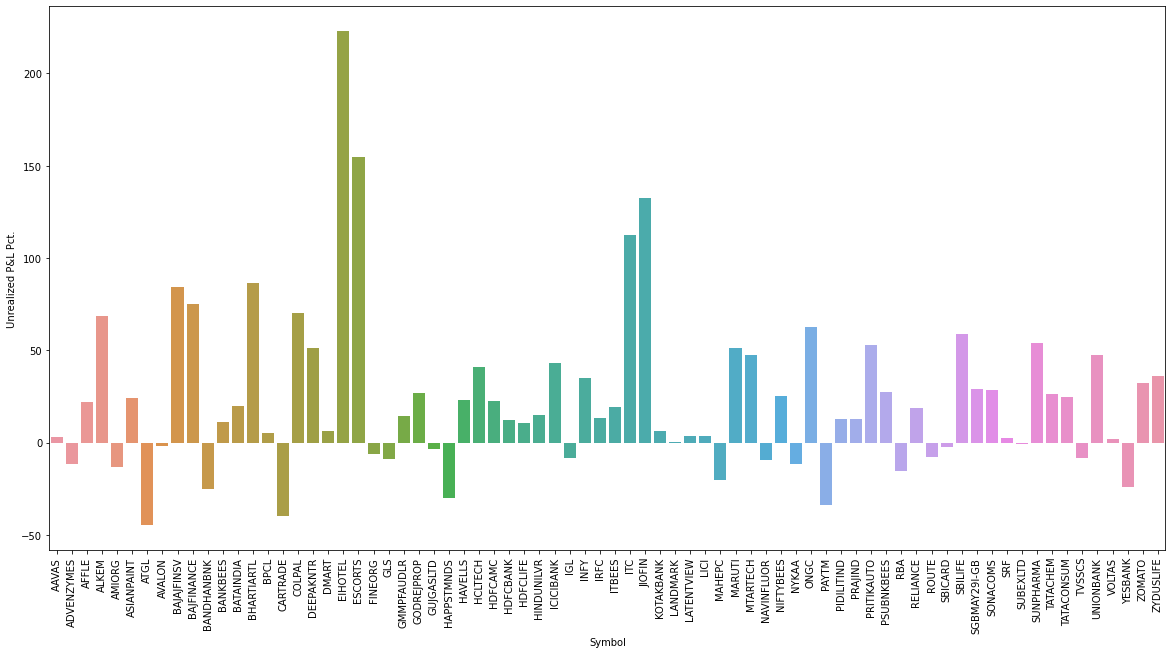

In [130]:
plt.figure(figsize=(20,10))
sns.barplot(holding.Symbol,holding['Unrealized P&L Pct.'])
plt.xticks(rotation="90")
plt.show()

In [131]:
holding_profit.head()

,Symbol,ISIN,Sector,Quantity Available,Quantity Discrepant,Quantity Long Term,Quantity Pledged (Margin),Quantity Pledged (Loan),Average Price,Previous Closing Price,Unrealized P&L,Unrealized P&L Pct.,invs_amount,% profit
0,AAVAS,INE216P01012,Financials,3,0,0,0,0,1504.9500,1546.15,123.60,2.7376,4514.8500,0.03
2,AFFLE,INE00WC01027,Communication Services,31,0,18,0,0,994.6887,1213.20,6773.85,21.9678,30835.3497,1.79
3,ALKEM,INE540L01014,Health Care,9,0,8,0,0,2922.2333,4919.35,17974.05,68.3421,26300.0997,4.75
5,ASIANPAINT,INE021A01026,Materials,4,0,2,0,0,2669.7000,3313.90,2576.80,24.1301,10678.8000,0.68
8,BAJAJFINSV,INE918I01026,Financials,31,0,20,0,0,940.9161,1733.15,24559.25,84.1981,29168.3991,6.49


In [132]:
holding_profit.sort_values(by='Unrealized P&L Pct.', ascending =False)[['Symbol','% profit','Unrealized P&L Pct.']].head(20)

,Symbol,% profit,Unrealized P&L Pct.
19,EIHOTEL,2.71,222.9950
20,ESCORTS,4.52,154.8216
39,JIOFIN,0.50,132.4287
38,ITC,1.60,112.2545
13,BHARTIARTL,1.94,86.2657
8,BAJAJFINSV,6.49,84.1981
9,BAJFINANCE,1.70,74.8757
16,COLPAL,3.63,70.0135
3,ALKEM,4.75,68.3421
50,ONGC,2.15,62.6775


In [133]:
holding_loss.sort_values(by='Unrealized P&L Pct.', ascending =True)[['Symbol','% loss','Unrealized P&L Pct.']].head(10)

,Symbol,% loss,Unrealized P&L Pct.
6,ATGL,3.20,-44.8219
15,CARTRADE,9.57,-39.9089
51,PAYTM,4.70,-34.0407
26,HAPPSTMNDS,13.69,-30.2023
10,BANDHANBNK,9.65,-25.2191
71,YESBANK,4.46,-24.1411
44,MAHEPC,5.95,-20.0496
56,RBA,1.92,-15.3144
4,AMIORG,5.23,-13.2295
49,NYKAA,9.18,-11.6301


In [134]:
import plotly.express as px

In [148]:
df = holding_profit

fig = px.scatter(df, x="Unrealized P&L", y="Unrealized P&L Pct.", size="% profit", color="Symbol",
                 hover_name="% profit", log_x=True, size_max=100)
fig.show()

In [146]:
df_loss = holding_loss

fig = px.scatter(df_loss, x="invs_amount", y="% profit", size="Unrealized P&L Pct.", color="Symbol",
                 hover_name="Unrealized P&L Pct.", log_x=True, size_max=100)
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Symbol', 'ISIN', 'Sector', 'Quantity Available', 'Quantity Discrepant', 'Quantity Long Term', 'Quantity Pledged (Margin)', 'Quantity Pledged (Loan)', 'Average Price', 'Previous Closing Price', 'Unrealized P&L', 'Unrealized P&L Pct.', 'invs_amount', '% loss'] but received: % profit

In [145]:
#df = holding_loss
#df['Unrealized P&L Pct.']=df['Unrealized P&L Pct.']
#fig = px.scatter(df, x="invs_amount", y="% loss", size="Unrealized P&L Pct.", color="Symbol",
#                 hover_name="Unrealized P&L Pct.", log_x=True, size_max=100)
#fig.show()

In [137]:
invst_df['Symbol']=invst_df['Symbol'].apply(lambda x:x.replace("AFFLE-BE","AFFLE"))

In [138]:
last_buy=invst_df.groupby('Symbol')['Trade Date'].max().reset_index().sort_values('Trade Date',ascending=True)

In [139]:
last_buy_symbol_list=last_buy['Symbol'].to_list()

In [140]:
last_buy_time_list=last_buy['Trade Date'].to_list()

In [141]:
stock_time = {}
for key in last_buy_symbol_list:
    for value in last_buy_time_list:
        stock_time[key] = value
        last_buy_time_list.remove(value)
        break
 
# Printing resultant dictionary
print("Resultant dictionary is : " + str(stock_time))

Resultant dictionary is : {'HINDPETRO': Timestamp('2020-01-27 00:00:00'), 'IRCTC': Timestamp('2020-02-01 00:00:00'), 'RVNL': Timestamp('2020-02-01 00:00:00'), 'CENTURYTEX': Timestamp('2020-02-14 00:00:00'), 'BOROSIL': Timestamp('2020-02-18 00:00:00'), 'BORORENEW': Timestamp('2020-02-20 00:00:00'), 'INDUSINDBK': Timestamp('2020-03-27 00:00:00'), 'CONCOR': Timestamp('2020-04-09 00:00:00'), 'SPENCERS': Timestamp('2020-05-22 00:00:00'), 'SCI': Timestamp('2020-07-29 00:00:00'), 'YESBANK': Timestamp('2020-07-29 00:00:00'), 'TATASTEEL': Timestamp('2020-12-21 00:00:00'), 'IGL': Timestamp('2021-03-02 00:00:00'), 'BATAINDIA': Timestamp('2021-04-12 00:00:00'), 'ESCORTS': Timestamp('2021-05-03 00:00:00'), 'HESTERBIO': Timestamp('2021-05-18 00:00:00'), 'HDFC': Timestamp('2021-05-26 00:00:00'), 'ITC': Timestamp('2021-05-26 00:00:00'), 'MARUTI': Timestamp('2021-05-26 00:00:00'), 'RITES': Timestamp('2021-06-17 00:00:00'), 'IBULHSGFIN': Timestamp('2021-06-17 00:00:00'), 'INOXLEISUR': Timestamp('2021-09

In [142]:
x=(last_buy[last_buy.Symbol=='HINDPETRO']['Trade Date']).values
y=(last_buy[last_buy.Symbol=='BAJAJFINSV']['Trade Date']).values
z=x-y

In [143]:
x

array(['2020-01-27T00:00:00.000000000'], dtype='datetime64[ns]')